In [1]:
#basic library
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# getting the data
df= pd.read_csv(r'C:\Users\DELL\Documents\spam.csv', encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
df.shape     #checking the dimension of dataframe 


(5572, 5)

In [4]:
# general summary of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


We can drop Unnamed: 2, Unnamed: 3, Unnamed: 4, as these are the columns which generate as a result of additional parameter pass while calling the data.
Also we don't observe any null values in the v1 and v2 column, which means our main two columns(label and features) are free from null values. we can go forward with them as it is.

In [5]:
# dropping the unwanted columns
data= df.drop(columns= ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis= 1)
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


This will be our final data set, which consist of two major columns, v1 which is our label column while v2 is the feature text column on which we need to perform all the pre processing. Since our feature is text, which ultimately means it is a NLP Problem.

In [6]:
# checking the dimension of our final dataset.
data.shape

(5572, 2)

Our new dataset consist of 5572 rows and 2 columns, one owhich is label and other one is text feature.

In [7]:
# getting the general summary of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


We can see that our dataset has no null values, we can say it is safe to proceed ahead.

In [8]:
# statistical description of final dataset.
data.describe(include= object)

,v1,v2
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


From here we can see that both the columns has total number of 5572 values, where our label data consist of two unique values, which serve as the classes for label and feature consist of maximum number of unique values.

In [9]:
# checking the classes distribution in label column
data['v1'].value_counts()

ham     4825
spam     747
Name: v1, dtype: int64

We can observe the imbalance in the distribution of data among the classes of label. The ham label got 4825 data while spam has 747 data. We will keep this in mind while building model.

# Visualization (EDA)

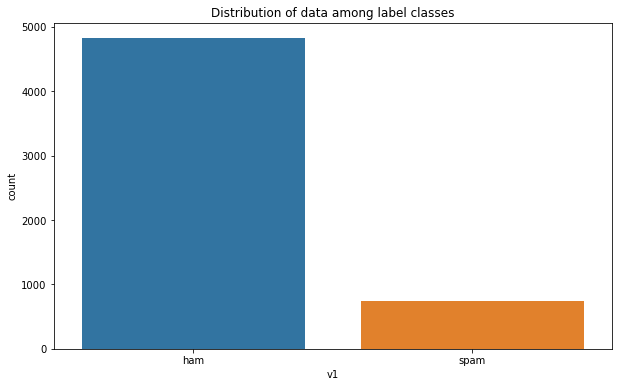

In [10]:
plt.figure(figsize= (10,6))
sns.countplot(data['v1'])
plt.title("Distribution of data among label classes")
plt.show()

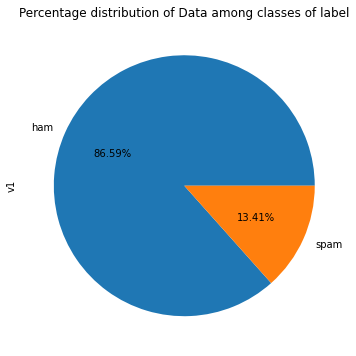

In [11]:
plt.figure(figsize=(10,6))
(data['v1'].value_counts()*100.0 /len(data)).plot.pie(autopct='%.2f%%')
plt.title("Percentage distribution of Data among classes of label")
plt.show()

From here also we can see that around 86.59% of data is ham while 13.41% of data is spam. The imabalance is clear between the classes of label. We need to balance them while building model.

In [12]:
# finding the lenght of v2 which is our text data
data['text_lenght']=data['v2'].str.len()
data.head(2)

,v1,v2,text_lenght
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29


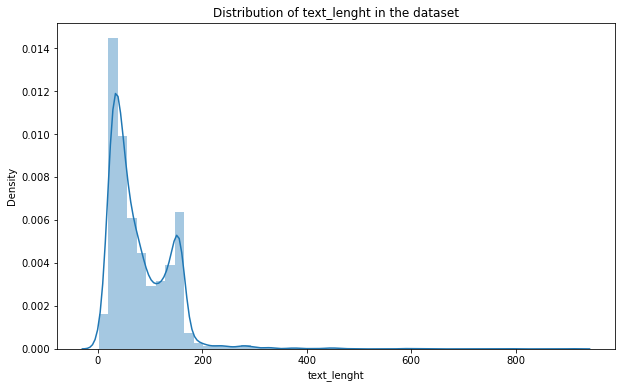

In [13]:
plt.figure(figsize=(10,6))
sns.distplot(data['text_lenght'])
plt.title("Distribution of text_lenght in the dataset")
plt.show()

We can observe that most of the data text lenght lies between 0-200, there are some large text as well, with word lenght greater than 800. However such text are minority.

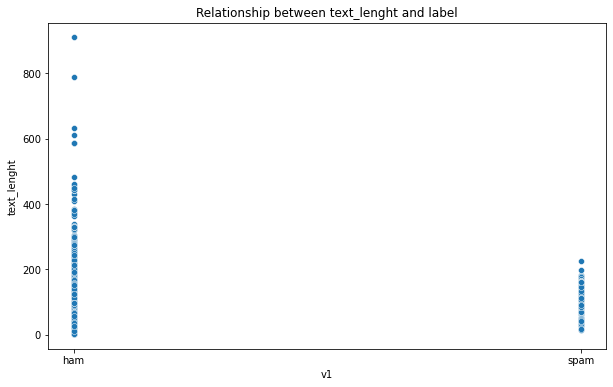

In [14]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='v1', y= 'text_lenght', data= data)
plt.title("Relationship between text_lenght and label")
plt.show()

Its unique to see that mostly spam mail, is consist of usual text_lenght i.e 0-200 while ham can be a bigger text. However this can't be the deciding factor as most of ham also lies well within the wordlimit of 0-200.

# Pre processing

In [15]:
# importing NLP libraries
from IPython.display import display, HTML
display(HTML("<style>.container {width: 100% !important; }</style>"))

import re

import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [24]:
#expanding english language contractions:
def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)
    
    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", "s", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    phrase = re.sub(r"\'u", " you", phrase)
    
    return phrase
    

In [25]:
# defining stop words and lemmatizer
stop_words=set(stopwords.words('english')+ ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure', 'dun'])
lemmatizer= WordNetLemmatizer()
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [26]:
preprocessed_text=[]
from tqdm import tqdm
#tqdm is for printing the status bar
for sentance in tqdm(data['v2'].values):
    sent= decontracted(sentance)
    sent = re.sub(r'https?:\/\/.*[\r\n]*', '', sent)    #remove hyperlinks
    sent = re.sub(r'^.+@[^\.].*\.[a-z]{2,}$','', sent)    # remove emails
    sent = re.sub(r'[^\w\d\s]', '',sent )      # removing punctuation
    sent = re.sub('[^A-Za-z]+', ' ', sent)      #remove special characters, numbers
    sent = ' '.join(e for e in sent.split() if e not in stop_words)  # removing stop words
    sent = ' '.join(lemmatizer.lemmatize(e) for e in sent.split())   # lemmatization
    preprocessed_text.append(sent.lower().strip()) # converting the text to lower case

100%|██████████| 5572/5572 [00:00<00:00, 13441.02it/s]


In [27]:
data['v2']= preprocessed_text    # assigning the clean value to the dataset

In [28]:
#checking clean length
data["clean_len"] = data["v2"].str.len() 

In [29]:
data.head()

,v1,v2,text_lenght,clean_len
0,ham,go jurong point crazy available bugis n great ...,111,82
1,ham,ok lar joking wif oni,29,21
2,spam,free entry wkly comp win fa cup final tkts st ...,155,101
3,ham,say early hor c already say,49,27
4,ham,nah think go usf life around though,61,35


We can observe some clear decrease in the lenght of data text.

In [30]:
# importing wordcloud module
from wordcloud import WordCloud

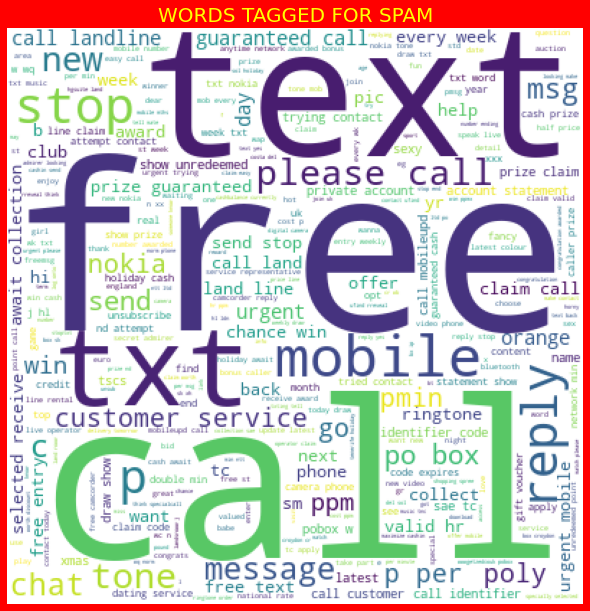

In [31]:
# making a dataframe which consist of spam text(v2) using which we will identify desired text.
one = data['v2'][data['v1']=='spam']

one_cloud = WordCloud(width=400,height=400,background_color='white',max_words=300).generate(' '.join(one))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(one_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label='WORDS TAGGED FOR SPAM',fontdict={'fontsize':20, 'fontweight':20, 'color':'yellow'})
plt.show()


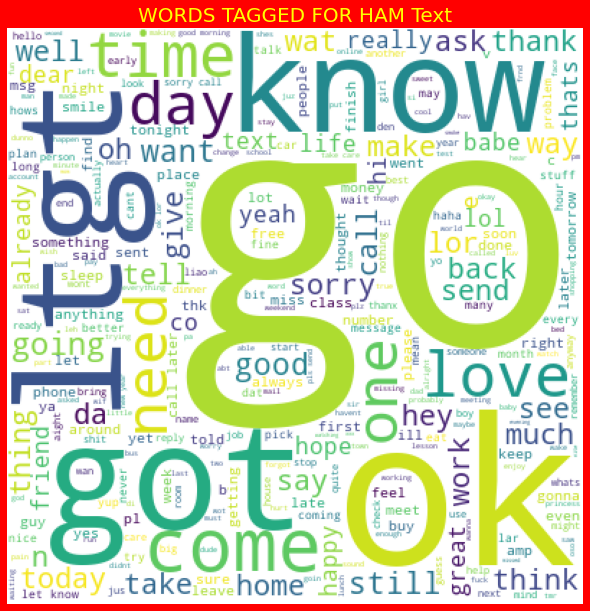

In [32]:
# making a dataframe which consist of spam text(v2) using which we will identify desired text.
one = data['v2'][data['v1']=='ham']

one_cloud = WordCloud(width=400,height=400,background_color='white',max_words=300).generate(' '.join(one))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(one_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label='WORDS TAGGED FOR HAM Text',fontdict={'fontsize':20, 'fontweight':20, 'color':'yellow'})
plt.show()


# Vectorization 

In [33]:
# 1. Convert text into vectors using TF-IDF
# 2. Split feature and label

from sklearn.feature_extraction.text import TfidfVectorizer
tf_vec = TfidfVectorizer()
features = tf_vec.fit_transform(data['v2'])

x = features


# we also need to encode Label column
data['v1'].replace(to_replace='spam', value=1, inplace=True)
data['v1'].replace(to_replace='ham', value=0, inplace=True)

# defining label as y
y= data['v1']


In [34]:
y.head(3)   # checking is encoding happened properly.

0    0
1    0
2    1
Name: v1, dtype: int64

# Model Building

In [35]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,classification_report,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss
from sklearn.metrics import roc_auc_score
from xgboost import XGBClassifier

In [36]:
#handling imbalanced data through smote technique
from imblearn.combine import SMOTETomek
from collections import Counter
os=SMOTETomek(sampling_strategy = {0: 5572, 1: 5572})
x1,y1=os.fit_resample(x,y)
print("The number of classes before fit{}".format(Counter(y)))
print("The number of classes after fit {}".format(Counter(y1)))

The number of classes before fitCounter({0: 4825, 1: 747})
The number of classes after fit Counter({0: 5572, 1: 5572})


We perform smote technique in order to balance the classes of label. Now we perform train test split , and starts with.




In [37]:
# splitting data into test and train sets
x_train,x_test,y_train,y_test = train_test_split(x1,y1,test_size=.30)

# Logistic Regression

In [38]:
#Model 
lr= LogisticRegression()
#fit
lr.fit(x_train,y_train)

#predict
y_pred= lr.predict(x_test)

print("\nClassification report :\n",classification_report(y_test,y_pred))


Classification report :
               precision    recall  f1-score   support

           0       0.91      0.99      0.95      1654
           1       0.99      0.90      0.94      1690

    accuracy                           0.95      3344
   macro avg       0.95      0.95      0.95      3344
weighted avg       0.95      0.95      0.95      3344



In [39]:
a_lr=accuracy_score(y_test,y_pred)
c_lr=cross_val_score(lr,x1,y1,cv=3).mean()
f_lr=f1_score(y_pred,y_test,average="weighted")
print("\naccuracy_score : ",a_lr,"\n","cross validation score :",c_lr,"\nF1 Score :",f_lr)
conf_mat=confusion_matrix(y_test,y_pred)

print('\n\n Confusion Matrix\n')
print(conf_mat)


accuracy_score :  0.9461722488038278 
 cross validation score : 0.9456209852357418 
F1 Score : 0.9462447766042239


 Confusion Matrix

[[1635   19]
 [ 161 1529]]


In [40]:
auc_roc_lr= roc_auc_score(y_test,y_pred)
print(" Auc ROC score of Logistic Regression is : ", auc_roc_lr)

 Auc ROC score of Logistic Regression is :  0.9466232121520002


In [41]:
lr_logloss= log_loss(y_test, y_pred)
lr_logloss

1.859149205572697

Being the first classification algorithm, Logistic Regression Model works really good with our dataset.

# MultinomialNB

In [42]:
#Model
mb= MultinomialNB()

#fit
mb.fit(x_train,y_train)

#Predict
y_pred=mb.predict(x_test)

print("\nClassification report :\n",classification_report(y_test,y_pred))
print("\n-----------------------------------------------------------\n")
a_mb=accuracy_score(y_test,y_pred)
c_mb=cross_val_score(mb,x1,y1,cv=3).mean()
f_mb=f1_score(y_pred,y_test,average="weighted")
print("---------Scores for Metrics---------")
print("accuracy_score : ",a_mb,"\n","cross validation score :",c_mb,"\nF1 Score :",f_mb)
auc_roc_mb= roc_auc_score(y_test,y_pred)
print(" Auc ROC score is : ", auc_roc_mb)
mb_logloss= log_loss(y_test, y_pred)
print("Log Loss is : ", mb_logloss)

print("\n\n--------------------------------------------------------------\n\n")
conf_mat=confusion_matrix(y_test,y_pred)
print("\n CONFUSION MATRIX \n",conf_mat)


Classification report :
               precision    recall  f1-score   support

           0       0.99      0.97      0.98      1654
           1       0.97      0.99      0.98      1690

    accuracy                           0.98      3344
   macro avg       0.98      0.98      0.98      3344
weighted avg       0.98      0.98      0.98      3344


-----------------------------------------------------------

---------Scores for Metrics---------
accuracy_score :  0.9805622009569378 
 cross validation score : 0.9763999446276901 
F1 Score : 0.9805642822579826
 Auc ROC score is :  0.9804923334501978
Log Loss is :  0.6713680766622894


--------------------------------------------------------------



 CONFUSION MATRIX 
 [[1611   43]
 [  22 1668]]


We can observe slight improvement in the performance of model. The performance of Naive Bayes is comparitively little better than logistic Regression.

# DecisionTree Classifier

In [43]:
#Model
dt= DecisionTreeClassifier()
#fit
dt.fit(x_train,y_train)

#predict
y_pred=dt.predict(x_test)

print("\nClassification report :\n",classification_report(y_test,y_pred))
print("\n-----------------------------------------------------------\n")
print("\n --------------------Scrores of Metrics--------------- \n")
a_dt=accuracy_score(y_test,y_pred)
c_dt=cross_val_score(dt,x1,y1,cv=3).mean()
f_dt=f1_score(y_pred,y_test,average="weighted")
print("accuracy_score : ",a_dt,"\n","cross validation score :",c_dt,"\nF1 Score :",f_dt)
auc_roc_dt= roc_auc_score(y_test,y_pred)
print(" Auc ROC score is : ", auc_roc_dt)
dt_logloss= log_loss(y_test, y_pred)
print("Log Loss is : ", dt_logloss)

print("\n\n--------------------------------------------------------------\n\n")
conf_mat=confusion_matrix(y_test,y_pred)
print("\n CONFUSION MATRIX \n",conf_mat)


Classification report :
               precision    recall  f1-score   support

           0       0.98      0.97      0.98      1654
           1       0.97      0.98      0.98      1690

    accuracy                           0.98      3344
   macro avg       0.98      0.98      0.98      3344
weighted avg       0.98      0.98      0.98      3344


-----------------------------------------------------------


 --------------------Scrores of Metrics--------------- 

accuracy_score :  0.9769736842105263 
 cross validation score : 0.9750538563359137 
F1 Score : 0.976975259841038
 Auc ROC score is :  0.9769227191746027
Log Loss is :  0.7953117714981802


--------------------------------------------------------------



 CONFUSION MATRIX 
 [[1608   46]
 [  31 1659]]


We can see that the performance of Decision Tree is comparaitively low, as compaired to previous two algorithms. Let's chck how ensemble algorithms works for our dataset.

# Ensemble Technique 

In [54]:
# Model
rf= RandomForestClassifier()

#fit
rf.fit(x_train,y_train)

#predict
y_pred=rf.predict(x_test)

print("\nClassification report :\n",classification_report(y_test,y_pred))
print("\n-----------------------------------------------------------\n")
print("\n --------------------Scores for metrics-----------------\n")
a_rf=accuracy_score(y_test,y_pred)
c_rf=cross_val_score(rf,x1,y1,cv=3).mean()
f_rf=f1_score(y_pred,y_test,average="weighted")
print("accuracy_score : ",a_rf,"\n","cross validation score :",c_rf,"\nF1 Score :",f_rf)
auc_roc_rf= roc_auc_score(y_test,y_pred)
print(" Auc ROC score is : ", auc_roc_rf)
rf_logloss= log_loss(y_test, y_pred)
print("Log Loss is : ", rf_logloss)

print("\n\n--------------------------------------------------------------\n\n")
conf_mat=confusion_matrix(y_test,y_pred)
print("\n CONFUSION MATRIX \n",conf_mat)


Classification report :
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1654
           1       1.00      0.99      0.99      1690

    accuracy                           0.99      3344
   macro avg       0.99      0.99      0.99      3344
weighted avg       0.99      0.99      0.99      3344


-----------------------------------------------------------


 --------------------Scores for metrics-----------------

accuracy_score :  0.9946172248803827 
 cross validation score : 0.9934493977536526 
F1 Score : 0.9946170766138221
 Auc ROC score is :  0.9946616772679465
Log Loss is :  0.18591494446867704


--------------------------------------------------------------



 CONFUSION MATRIX 
 [[1652    2]
 [  16 1674]]


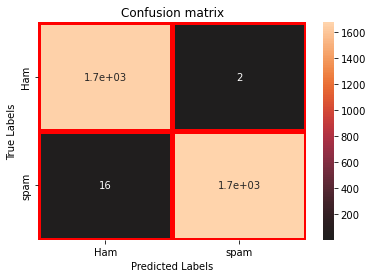

In [56]:
# plot confusion matrix heatmap
conf_mat = confusion_matrix(y_test,y_pred)

ax=plt.subplot()

sns.heatmap(conf_mat,annot=True,ax=ax,linewidths=5,linecolor='r',center=0)

ax.set_xlabel('Predicted Labels');ax.set_ylabel('True Labels')

ax.set_title('Confusion matrix')
ax.xaxis.set_ticklabels(['Ham','spam'])
ax.yaxis.set_ticklabels(['Ham','spam'])
plt.show()

We can observe that RandomForest classifier works really good with our dataset, let's first observe how support vector matrix classifier works with our dataset before deciding on best model.
As its an NPL problem SVM algorithms could be a good algorithm as well.

# SVM

In [62]:
# Model
svc= SVC()

#fit
svc.fit(x_train,y_train)

#predict
y_pred=svc.predict(x_test)

print("\nClassification report :\n",classification_report(y_test,y_pred))
print("\n-----------------------------------------------------------\n")
print("\n ------------Scores for Metrics------------------")
a_svc=accuracy_score(y_test,y_pred)
c_svc=cross_val_score(rf,x1,y1,cv=3).mean()
f_svc=f1_score(y_pred,y_test,average="weighted")
print("accuracy_score : ",a_svc,"\n","cross validation score :",c_svc,"\nF1 Score :",f_svc)
auc_roc_svc= roc_auc_score(y_test,y_pred)
print(" Auc ROC score is : ", auc_roc_svc)
svc_logloss= log_loss(y_test, y_pred)
print("Log Loss is : ", svc_logloss)

print("\n\n--------------------------------------------------------------\n\n")
conf_mat=confusion_matrix(y_test,y_pred)
print("\n CONFUSION MATRIX \n",conf_mat)


Classification report :
               precision    recall  f1-score   support

           0       1.00      0.97      0.98      1654
           1       0.97      1.00      0.98      1690

    accuracy                           0.98      3344
   macro avg       0.98      0.98      0.98      3344
weighted avg       0.98      0.98      0.98      3344


-----------------------------------------------------------


 ------------Scores for Metrics------------------
accuracy_score :  0.9829545454545454 
 cross validation score : 0.9932699209253458 
F1 Score : 0.9829613134419063
 Auc ROC score is :  0.9827883631576311
Log Loss is :  0.5887420552545284


--------------------------------------------------------------



 CONFUSION MATRIX 
 [[1600   54]
 [   3 1687]]


In [46]:
# hyper parameter tuning
SVC()
from sklearn.model_selection import GridSearchCV

# selecting for parameters
param_grid= { 'C': [1,3,5,10],
            'gamma' : ['auto', 'scale'],
            'kernel' :['linear','rbf', 'sigmoid'],
             'degree' : [2,3] }

GCV=GridSearchCV(SVC(), param_grid, cv=5, scoring= "accuracy")
GCV.fit(x_train,y_train)    #fitting data into model
GCV.best_params_  # printing best parameter found by GridSearchCV


{'C': 5, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}

In [47]:
GCV_pred=GCV.best_estimator_.predict(x_test)   #predicting using best parameters
accuracy_score(y_test, GCV_pred)  

0.9844497607655502

In [48]:
f1_score(y_test, GCV_pred)

0.9848308051341891

In [49]:
log_loss(y_test, GCV_pred)

0.5370981915092311

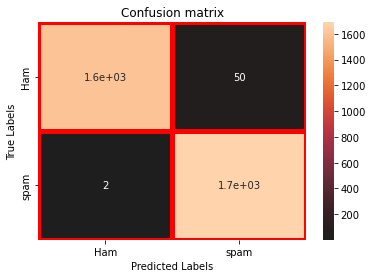

In [50]:
# plot confusion matrix heatmap
conf_mat = confusion_matrix(y_test,GCV_pred)

ax=plt.subplot()

sns.heatmap(conf_mat,annot=True,ax=ax,linewidths=5,linecolor='r',center=0)

ax.set_xlabel('Predicted Labels');ax.set_ylabel('True Labels')

ax.set_title('Confusion matrix')
ax.xaxis.set_ticklabels(['Ham','spam'])
ax.yaxis.set_ticklabels(['Ham','spam'])
plt.show()

Even after hyper parameter tuning the score remains almost same. There is slight improvement in f1 score. Overall we conclude that SCV performs much better, with minimum loss/error and maximum accuracy.

# Summary of Each Model


In [51]:
# let's summarize each models to make final decision

accuracy=[a_lr,a_mb, a_dt, a_rf, a_svc]
F1_Score=[f_lr, f_mb, f_dt, f_rf, f_svc]
Roc_Auc= [auc_roc_lr, auc_roc_mb, auc_roc_dt, auc_roc_rf, auc_roc_svc]
Cross_score= [c_lr, c_mb, c_dt, c_rf, c_svc]
logLoss=[lr_logloss, mb_logloss, dt_logloss, rf_logloss, svc_logloss]

Model= pd.DataFrame({
    'Models':['Logistc Regression', 'MultiNomialNB', 'DecisionTreeClassifier', 'RandomForest Classifier', 'SVC'],
    'Accuracy Score': accuracy, 'F1-Score' : F1_Score, 'ROC_AUC_SCORE' :Roc_Auc,
    'Cross Validation Score': Cross_score , 'Log Loss': logLoss})

Model.sort_values(by ='Log Loss', ascending = True )


,Models,Accuracy Score,F1-Score,ROC_AUC_SCORE,Cross Validation Score,Log Loss
3,RandomForest Classifier,0.994019,0.994019,0.994070,0.993090,0.206572
4,SVC,0.982955,0.982961,0.982788,0.993360,0.588742
1,MultiNomialNB,0.980562,0.980564,0.980492,0.976400,0.671368
2,DecisionTreeClassifier,0.976974,0.976975,0.976923,0.975054,0.795312
0,Logistc Regression,0.946172,0.946245,0.946623,0.945621,1.859149


We can see that RandomForest classifier Algorithm with tfidf vectorization seems to work best with our dataset. this will be our final model
Let's go ahead and save it.

# Saving the best fitted model

In [53]:
# saving best performing model and saving the model to disk
import pickle
filename= "Email_spam_classification_project.pk"
pickle.dump(rf, open(filename, 'wb'))